In [1]:
import os
import sys
import pandas as pd
sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())) + "/..")
if os.getcwd().endswith("Topic1"):
    os.chdir("..")
    print(f"Changed to {os.getcwd()}")
from codebase import get_total_inhabitants_and_willingness, number_of_residents_in_detour, load_buurt_data

Changed to c:\Users\20203721\OneDrive - TU Eindhoven\Documents\1BM130 Design of AI driven business operations\Design-of-AI-driven-business-operation


In [2]:
within_mins = 50
punt = "trein" # ibis, hbo_wo, mbo, basis, highschool, bus, trein
mode = "fiets" # fiets, ebike
location = "Train - NS" # Elementary Schools, High Schools, Universities, Train - NS, Train - Local

total, total_willing = get_total_inhabitants_and_willingness(punt1=punt, mode=mode, within_mins=within_mins, location=location, verbose=True)

Loaded file from CSV
Total inhabitants within 50 minutes of trein from buurt: 16790525 of 17811291 = 94.27% of the Netherlands
Total willingness to cycle of those: 9752691 of 16790525 = 58.08%


In [3]:
detour_factor = 1.3
within_mins = 30

number_of_residents_in_detour(detour_factor, punt, mode, within_mins)

Loaded file from CSV


,train_id,bu_code,reistijd_min,reisafstand_m,afstand_hemelsbreed_m,omrijdfactor,regio,a_inw
1648,461,BU05990535,6.0,1441.0,949,1.52,Oude Noorden,17495
2640,461,BU05990660,10.0,2500.0,1812,1.38,Schiebroek,16930
3090,232,BU06370601,14.0,3894.0,2852,1.37,Oosterheem-Noord-Oost,15885
615,466,BU05991284,3.0,847.0,647,1.31,Lombardijen,14725
486,415,BU02680970,3.0,929.0,402,2.31,Lent,13400
...,...,...,...,...,...,...,...,...
1675,266,BU01501009,6.0,1771.0,1251,1.42,Handelspark De Weteringen,0
1670,290,BU03073301,6.0,1843.0,1393,1.32,Bedrijventerrein Vathorst-Zuid,0
3122,366,BU03212060,14.0,2877.0,2125,1.35,Hof van Wulven,0
3129,391,BU09950117,14.0,3519.0,2561,1.37,Overijsselse Hout,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def read_all_punt_to_punt(punten, modes):
    matrix_data = {}

    for punt in punten:
        for mode in modes:
            key = f"{punt}_{mode}"
            try:
                df = load_buurt_data(punt, mode)
                matrix_data[key] = df.copy()
            except Exception as e:
                print(f"Skipping {key}: {e}")

    return matrix_data



In [13]:
def make_detour_matrix(matrix_data):
    # Define bin edges
    bins = [1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, float("inf")]

    # Generate labels automatically
    labels = [
        f"{bins[i]:.2f}–{bins[i+1]:.2f}" if bins[i+1] != float("inf") else f">{bins[i]:.2f}"
        for i in range(len(bins) - 1)
    ]

    proportion_matrix = {}
    for key, df in matrix_data.items():
        # Bin the omrijdfactor
        df["bin"] = pd.cut(df["omrijdfactor"], bins=bins, labels=labels, right=False)
        
        # Count per bin
        counts = df["bin"].value_counts().reindex(labels, fill_value=0)
        total = counts.sum()
        
        # Store row-wise proportions
        proportions = counts / total if total > 0 else [0] * len(labels)
        proportion_matrix[key] = proportions


    # Convert to matrix DataFrame
    matrix_df = pd.DataFrame(proportion_matrix).T  # Transpose so rows are punt_mode
    matrix_df.index.name = "punt_mode"
    matrix_df.columns.name = "omrijdfactor_bin"

    # Display as a table
    #print(matrix_df)

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix_df, annot=True, cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Percentage'})
    plt.title("Detour Factor Distribution form Punt to Buurt and Mode")
    plt.ylabel("Punt to Buurt and Mode")
    plt.xlabel("Detour Factor Bin")
    plt.tight_layout()
    plt.show()


In [11]:
punten = ['basis', 'bus', 'hbo_wo', 'highschool', 'ibis', 'mbo', 'trein']
modes = ['fiets', 'ebike']

matrix_data = read_all_punt_to_punt(punten, modes)


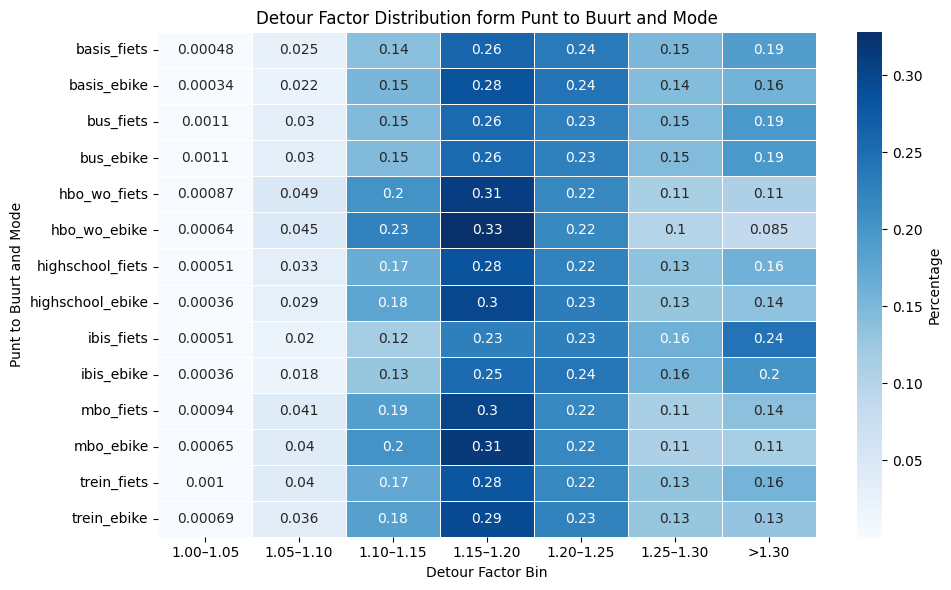

In [14]:
make_detour_matrix(matrix_data)

In [ ]:
punten = ['basis', 'bus', 'hbo_wo', 'highschool', 'ibis', 'mbo', 'trein']

modes = ['fiets', 'ebike']

# Dictionary to store matrix data
matrix_data = {}

for punt in punten:
    for mode in modes:
        key = f"{punt}_{mode}"
        try:
            df = load_buurt_data(punt, mode)
            matrix_data[key] = df.copy()
        except Exception as e:
            print(f"Skipping {key}: {e}")


In [ ]:
# Define bin edges
bins = [1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, float("inf")]

# Generate labels automatically
labels = [
    f"{bins[i]:.2f}–{bins[i+1]:.2f}" if bins[i+1] != float("inf") else f">{bins[i]:.2f}"
    for i in range(len(bins) - 1)
]

In [7]:
proportion_matrix = {}
for key, df in matrix_data.items():
    # Bin the omrijdfactor
    df["bin"] = pd.cut(df["omrijdfactor"], bins=bins, labels=labels, right=False)
    
    # Count per bin
    counts = df["bin"].value_counts().reindex(labels, fill_value=0)
    total = counts.sum()
    
    # Store row-wise proportions
    proportions = counts / total if total > 0 else [0] * len(labels)
    proportion_matrix[key] = proportions


# Convert to matrix DataFrame
matrix_df = pd.DataFrame(proportion_matrix).T  # Transpose so rows are punt_mode
matrix_df.index.name = "punt_mode"
matrix_df.columns.name = "omrijdfactor_bin"

# Display as a table
print(matrix_df)


omrijdfactor_bin  1.00–1.05  1.05–1.10  1.10–1.15  1.15–1.20  1.20–1.25  \
punt_mode                                                                 
basis_fiets        0.000483   0.024663   0.139325   0.260730   0.235291   
basis_ebike        0.000336   0.022149   0.151687   0.282366   0.243143   
bus_fiets          0.001143   0.029952   0.146517   0.255262   0.226900   
bus_ebike          0.001143   0.029952   0.146517   0.255262   0.226900   
hbo_wo_fiets       0.000869   0.048557   0.202409   0.308905   0.218711   
hbo_wo_ebike       0.000643   0.045416   0.225308   0.327701   0.216318   
highschool_fiets   0.000510   0.032646   0.165302   0.282476   0.224867   
highschool_ebike   0.000357   0.029039   0.177614   0.298386   0.231006   
ibis_fiets         0.000511   0.019515   0.117883   0.228750   0.229123   
ibis_ebike         0.000357   0.018016   0.129417   0.253848   0.240174   
mbo_fiets          0.000945   0.040655   0.186500   0.303092   0.218800   
mbo_ebike          0.0006

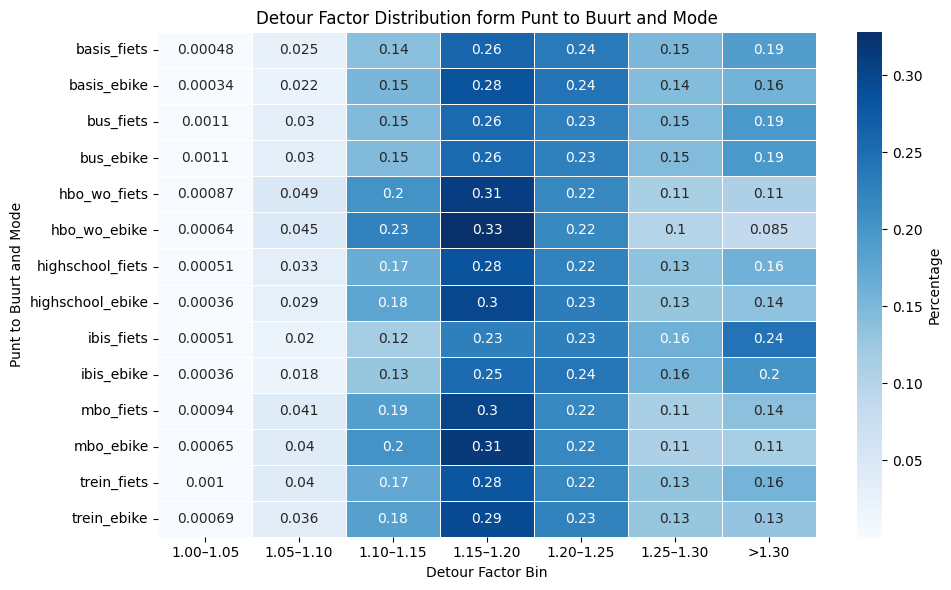

In [8]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(matrix_df, annot=True, cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Percentage'})
plt.title("Detour Factor Distribution form Punt to Buurt and Mode")
plt.ylabel("Punt to Buurt and Mode")
plt.xlabel("Detour Factor Bin")
plt.tight_layout()
plt.show()